# Spin Sistemleri

Temel parçacıkların bir manyetik alan altında yön değiştirdikleri gözleminden yola çıkarak tıpkı birer küçük mıknatıs gibi davrandıkları söylenebilir. Bu özellik, belirli bir yüke sahip makroskopik cisimlerin dönüşleriyle ilişkili olarak kazandıkları manyetik özelliklerden yola çıkarak **'spin'** olarak adlandırılmış fakat temel parçacıklar söz konusu olduğunda asıl olarak kuantum mekaniğinin temel çıkarımlarıyla ilişkili. Spin sistemleri istatistiksel fiziğin giriş aşamasında temel istatistiksel ilişkileri (ortalama/standart sapma/dağılımlar) ve zayıf etkileşimleri incelemek üzere oldukça kullanışlı 'oyuncak modeller'. Sahip oldukları **manyetik moment ($\mu_0$)** ile ilişkili olarak bulundukları noktadaki manyetik alanla ve tanımlanabilecek daha karmaşık yollarla etrafındaki spinlerle etkileşebiliyorlar. Bu örnek çalışmada **spin $1/2$** olan parçacıkların davranışlarını, yani sadece **'yukarı'** ve **'aşağı'** şeklinde iki durumda yönlenebilen, dolayısıyla 2 farklı duruma sahip olan sistemleri inceleyeceğiz (örneğin elektron). (Spin'in 'aşağı' olması ortamdaki manyetik alanın tersi yönde, yukarı olması ise manyetik alanla ynı yönde yönlendiği anlamına geliyor.)

Bu uygulamada spin sistemlerinin rastgele dağılımlarından başlayarak ortalama manyetik momentlerini, bunların standart sapmalarını inceleyip ardından sistemin dışarda bir $T$ sıcaklığında bir ısı rezervi ile etkileşimi halinde nasıl dağılacağını modelleyip bu dağılımın **Boltzmann dağılımı** olduğunu göstereceğiz. 

Çalışma için Python'un ```numpy```, ```scipy``` ve ```matplotlib``` kütüphanelerini ağırlıklı olarak kullanacağız.

Öncelikle kullanacağımız kütüphaneleri yükleyerek başlayalım.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import random, math, os, pylab
from matplotlib.patches import FancyArrowPatch

İlk örneğimizde $p$ olasılıkla yukarı, $1-p$ olasılıkla da aşağı yönlü $n$ tane spin oluşturalım. Spinlerimiz iki değer aldıklarından ve yalnızca bu değerlerin olasılıkları ile modellendiklerinden birer Bernoulli rassal değişkeni (random variable) şeklinde dağılacaklar. ``` scipy.stats.bernoulli.rvs``` fonksiyonu bize $p$ olasılıklı $n$'tane $0$ ve $1$'ler üretiyor. Daha kolay çalışabilmek için (örneğin toplam spin sayısını doğrudan toplayarak bulmak için) bunları $1$ ve $-1$'e dönüştürmek için rassal değişkeni 2 ile çarpıp 1 çıkarıyoruz.

In [2]:
n = 36
p = 0.5
spin = stat.bernoulli.rvs(p, size=n)*2-1
print(spin)
print('Net spin = {} '.format(spin.sum()))
spin = list(spin)

[ 1  1 -1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1
 -1 -1  1  1  1 -1 -1  1  1 -1 -1]
Net spin = 6 


Oluşturduğumuz 36 spin'i $L \times L$ bir lattice'e yerleştirelim. Bunun için sayfanın sonunda ek olarak tanımladığımız görselleştirme fonksiyonumuz ```plot_configurations```'u kullanacağız. Yeşil ile gösterilenler 'aşağı' yönlü spinlerken, kırmızı ile gösterilenler 'yukarı' yönlü spinler.

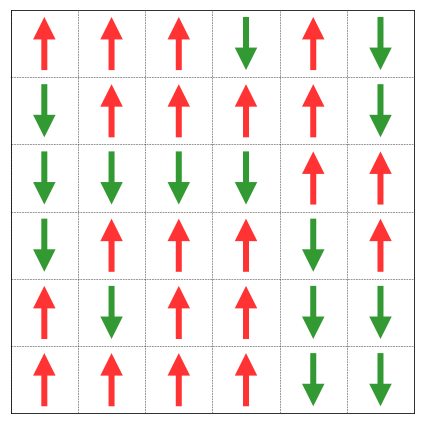

In [5]:
L = 6
plot_configurations([spin], L)

Üstteki konfigurasyon spin olasılıklarının eşit, yani yukarı gelme olasılığının da, aşağı gelme olasılığının da $0.5$ olduğu durumu gösteriyor. Aynı şeyi $p$ değerini değiştirip farklı olasılıklar için çizelim. ($p$ değerini spin'in 'yukarı' yönlü gelme ihtimali olarak düşünebilirsiniz.). Aşağıda $p = 0.1, 0.5, 0,8$ değerleri için konfigürasyonlar çizilmiş.

Olasılık (p) =  0.1


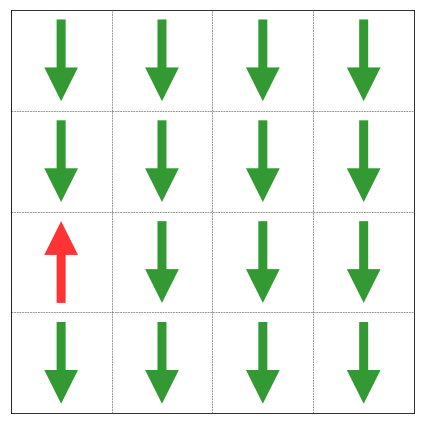

Olasılık (p) =  0.5


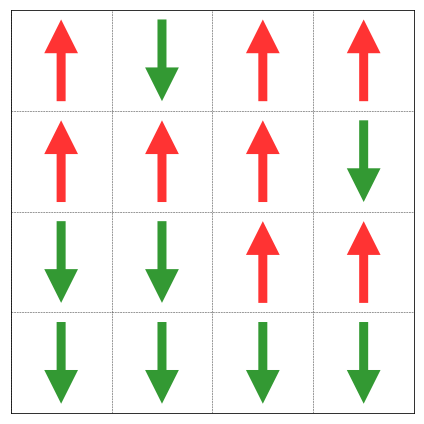

Olasılık (p) =  0.8


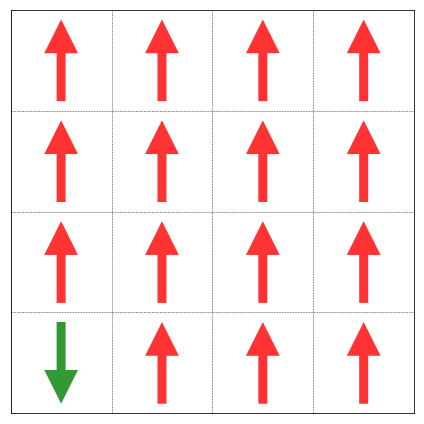

In [39]:
n = 16
L = 4
prob = np.arange(0.1,1.0,0.1)
for p in prob:
    spin = stat.bernoulli.rvs(p, size=n)*2-1
    if(p  == 0.1 or p == 0.5 or p == 0.8 or p == 1):
        print('Olasılık (p) = ', p)
        plot_configurations([spin], L)

Şimdi de net manyetik spin değerinin ortalamasını bulmaya çalışalım. Bunun için birbirinin 'benzeri', her birinde 36 spin yer alan 100 tane kopya sistem (ensemble) oluşturacağız. Sonrasında her birinin net spin değeri üzerinden ortalama ve ortalamadan sapmayı yani variance'ı hesaplayacağız.

In [7]:
n = 36
p = 0.25

N_trial = 100
ensemble = []
for i in range(N_trial):
    spin = stat.bernoulli.rvs(p, size=n)*2-1
    ensemble.append(spin)
net_spins = [np.sum(k) for k in ensemble]
print('Mean spin for prob = {} = {}'.format(p, np.mean(net_spins)))
print('Variance of spin for prob = {} = {}'.format(p, np.std(net_spins)/np.sqrt(n)))

Mean spin for prob = 0.25 = -17.78
Variance of spin for prob = 0.25 = 0.8457672387969531


Yukarıda yaptığımızı bir de farklı sayıda spin'le deneyelim. Aşağıda öncelikle ```number``` değişkeni ile 10'dan 100'e kadar 2'şer artan farklı spin sayıları oluşturup, ardından her spin sayısı değeri için yukarıdaki gibi 100'er örnekten oluşan ensemble'lar elde edip, her bir spin değeri için ortalamaları (```u_t```) ve göreli hataları (```Std_t```) kaydediyoruz. Göreli hata (relative error) $\sigma^2/N$ şekilde tanımlanıyor; $\sigma^2$ yani varyans $N$ ile gittiğinden, göreli hata $1/\sqrt{N}$ ile gidiyor.

In [17]:
number = np.arange(10,100,2)
u_t = []
Std_t = []
for k in number:
    p = 0.5
    N_trial = 100
    ensemble = []
    for i in range(N_trial):
        spin = stat.bernoulli.rvs(p, size=k)*2-1
        ensemble.append(spin)
    net_spins = [np.sum(m) for m in ensemble]
    u_t.append(np.mean(net_spins))
    Std_t.append(np.std(net_spins)/k)

The avarage value is $u = N \times (2p-1)$

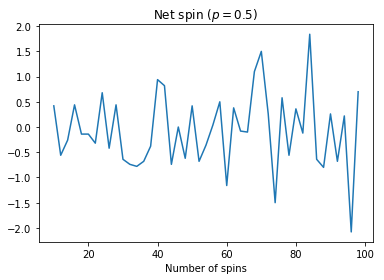

In [19]:
plt.plot(number, u_t)
plt.title('Net spin ($p = 0.5$)')
plt.xlabel('Number of spins')
plt.show()

Ortalama değer, $p = 0.5$ olduğundan $0$ civarında dolanıyor fakat spin sayısı arttıkça varyansın arttığı da açıkça görülebiliyor. Farklı bir $p$ değeri için, örneğin $p = 0.3$ için deneyelim; sonuç şöyle olacak:

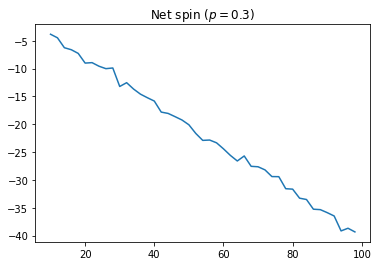

In [20]:
number = np.arange(10,100,2)
u_t = []
Std_t = []
for k in number:
    p = 0.3
    N_trial = 100
    ensemble = []
    for i in range(N_trial):
        spin = stat.bernoulli.rvs(p, size=k)*2-1
        ensemble.append(spin)
    net_spins = [np.sum(m) for m in ensemble]
    u_t.append(np.mean(net_spins))
    Std_t.append(np.std(net_spins)/k)
plt.plot(number, u_t)
plt.title('Net spin ($p = 0.3$)')
plt.show()

Göreli hata (relative error) ise $1/\sqrt{N}$ ile gittiğinden her iki durumda da azalıyor olacak.

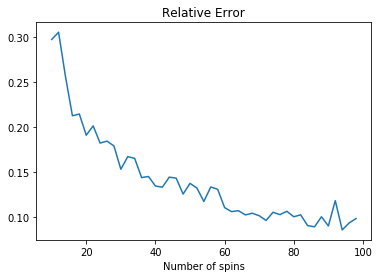

In [22]:
plt.plot(number, Std_t)
plt.title('Relative Error')
plt.xlabel('Number of spins')
plt.show()

# Isı Rezervi (Heat Bath) ve Boltzman Dağılımı

* $T$ sıcaklığında bir ısı rezervi ile etkileşimde olan tek bir spin için 'aşağı' (down) ve 'yukarı' (up) durumunda olma ihtimalleri şu şekilde veriliyor ($\beta = \frac{1}{kT}$, $k$: Boltzmann sabiti): $$ P(up) = \frac{e^{-\beta E_{up}}}{Z}$$ $$P(down) = \frac{e^{-\beta E_{down}}}{Z}$$ $Z$ fonksiyonu 'bölüşüm fonksiyonu' (partition function) olarak adlandırılıyor ve olasılıkları normalize ediyor: $$ Z = \sum{e^{-\beta E_{up}} + e^{-\beta E_{down}}}$$ 
* $\pm \mu_0$ manyetik spinine sahip iki spin durumunun $B$ manyetik alanında kazandıkları enerjiler: $E_{up} = - \mu_0 B$ and $E_{down} = \mu_0 B$
* Sistemin ortalama enerjisini şu şekilde hesaplıyoruz: $$\bar{E} = -\frac{\partial \ln{Z}}{\partial \beta} = -\mu_0 B \tanh{\beta \mu_0 B}$$
* Verilen $N$ spin için deneklemelerimiz $N$ ile ölçekleniyor; örneğin ortalama enerji şuna dönüşüyor $$\bar{E} = -N\mu_0 B \tanh{\beta \mu_0 B}$$
* Limit sıcaklık değerleri için enerjinin limit değerleri:
$$ \beta \rightarrow 0 \hspace{1cm} (T \rightarrow \infty), \hspace{1cm} \bar{E} \rightarrow -N \mu_0 B $$
$$ \beta \rightarrow \infty \hspace{1cm} (T \rightarrow 0), \hspace{1cm} \bar{E} \rightarrow 0 $$

Yukarıdaki değerleri simulasyon yaparak kestirmeye çalışalım. İlk olarak tek bir spin ile başlayalım. Kolaylık olsun diye enerjiyi $\mu_0B$ biriminde ölçelim (yani $\mu_0B = 1$) ve Boltzmann sabitini de $1$ olarak alalım. Verilen bir ```temp``` değerinde bir spin oluşturalım. Örneğin $T = 1.0$ için örnek bir spin üretelim:

In [40]:
temp = 1.0
beta = 1/temp
Z = np.exp(beta) + np.exp(-beta)
prob_up = np.exp(beta)/Z
prob_down = np.exp(-beta)/Z

a = np.random.uniform()
if a < prob_up:
    spin = +1
else:
    spin = -1

print('Spin is = ',spin)

Spin is =  1


Şimdi de 100 tane spin'den oluşan bir 'ensemble' oluşturup ortalama spin değeri ve varyansını hesaplayalım.

In [41]:
temp = 1.0
beta = 1/temp
Z = np.exp(beta) + np.exp(-beta)
prob_up = np.exp(beta)/Z
prob_down = np.exp(-beta)/Z
spin = []
for k in range(100):
    a = np.random.uniform()
    if a < prob_up:
        spin.append(+1)
    else:
        spin.append(-1)
print('Ortalama spin = ', np.mean(spin))
print('Varyans = ', np.var(spin))

Ortalama spin =  0.7
Varyans =  0.51


Bunu farklı sıcaklık değerleri için yapıp, ortalama enerjinin sıcaklık $T$ ile nasıl değiştiğine bakalım. Oluşturduğumuz random ensemble sonuçlarını teorik değer olan $\bar{E} = -N\mu_0 B \tanh{\beta \mu_0 B}$ ile karşılaştıralım ($\mu_0B = 1$).

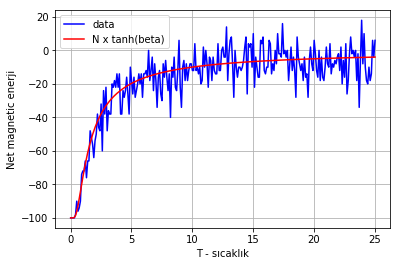

In [42]:
temp_range = np.arange(0.01, 25.1, 0.1) # sıcaklık değerleri
beta = 1/temp_range
Z = np.exp(beta) + np.exp(-beta) #bölüşüm fonksiyonu
prob_up = np.exp(beta)/Z #'yukarı' olma ihtimali
prob_down = np.exp(-beta)/Z #'aşağı' olma ihtimali
diff_t_samples = []

for i in range(len(temp_range)):
    ensemble = []
    for k in range(100):
        a = np.random.uniform()
        if a < prob_up[i]:
            ensemble.append(+1)
        else:
            ensemble.append(-1)
    diff_t_samples.append(ensemble)
    
net_spins = [-np.sum(x) for x in diff_t_samples]

plt.plot(temp_range, net_spins,'b',label = 'data')
plt.plot(temp_range, -100*np.tanh(beta), 'r', label='N x tanh(beta)')
plt.xlabel('T - sıcaklık')
plt.ylabel('Net magnetic enerji')
plt.grid(True)
plt.legend()
plt.show()    

Benzer şekilde tek bir spin yerine N tane spin alıp, $T$ sıcaklığında bir ısı rezervi ile etkileştirdiğimizde, spin konfigürasyonlarının sıcaklıkla değişimi aşağıdaki gibi olacak. Öncelikle düşük sıcaklıkta tüm spinler manyetik alan yönünde yönlenme eğiliminde olacaklar yani 'yukarı' (up) durumda olacaklar. Sıcaklık arttıkça ortamla etkileşim exponensiyel olarak azalacağından 'aşağı' yönlü spinler de ortaya çıkmaya başlayacak ve sıcaklığı daha da arttırdığımızda ortalama yarısının 'yukarı', yarısının 'aşağı' olduğu maksimum düzensiz duruma doğru yaklaşılacak. Bu durumlar, yukarıda verilen limit değerler çerçevesinde tutarlı görünüyor.

Spin Dağılımı T=  0.01


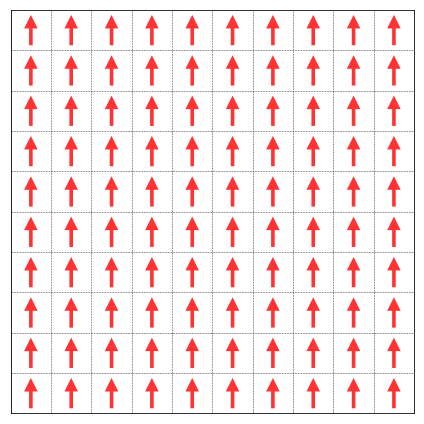

Spin Dağılımı T=  3.01


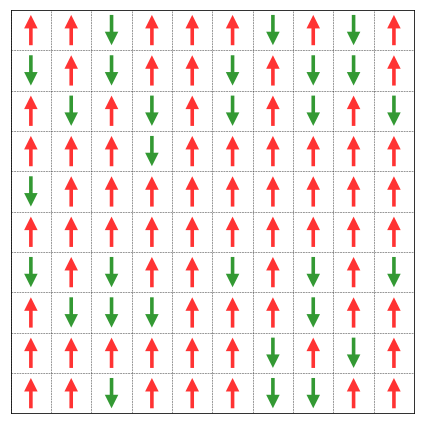

Spin Dağılımı T=  6.01


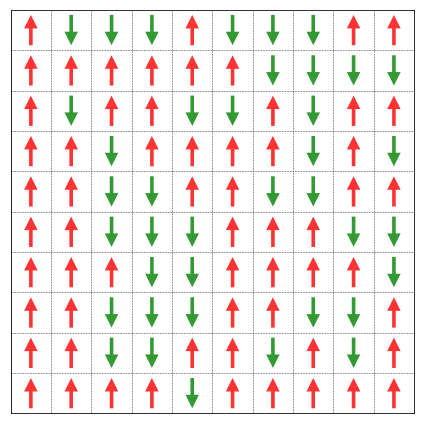

Spin Dağılımı T=  9.01


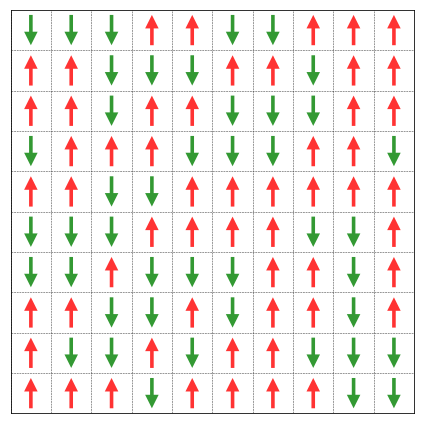

Spin Dağılımı T=  12.01


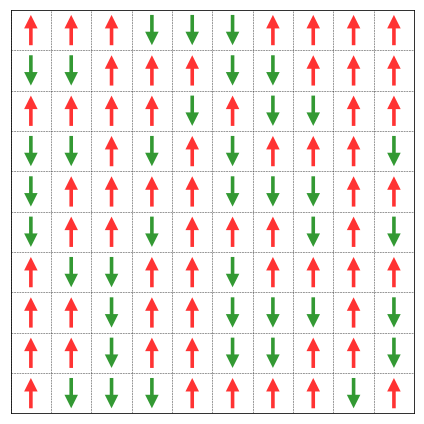

Spin Dağılımı T=  15.01


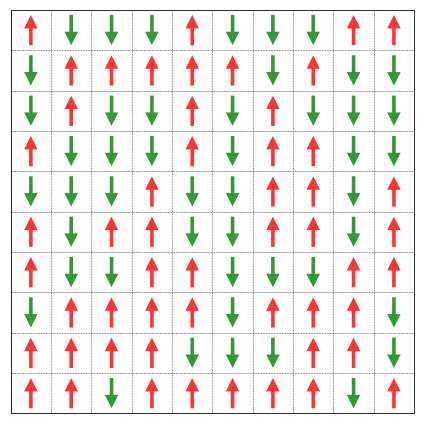

Spin Dağılımı T=  18.01


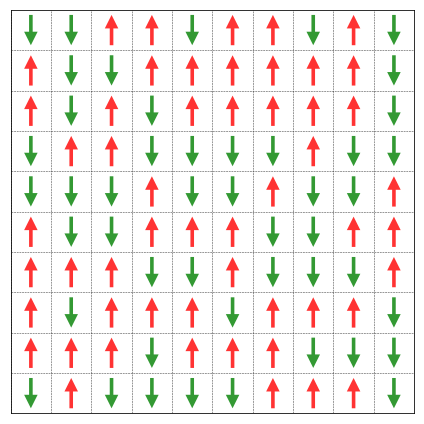

Spin Dağılımı T=  21.01


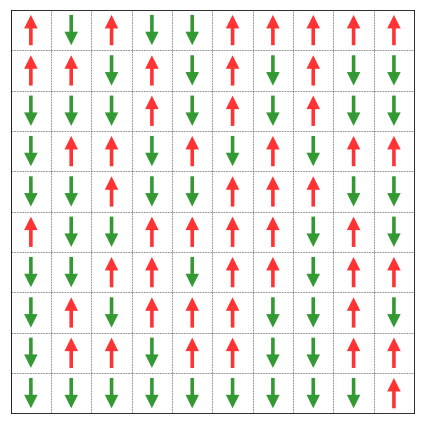

Spin Dağılımı T=  24.01


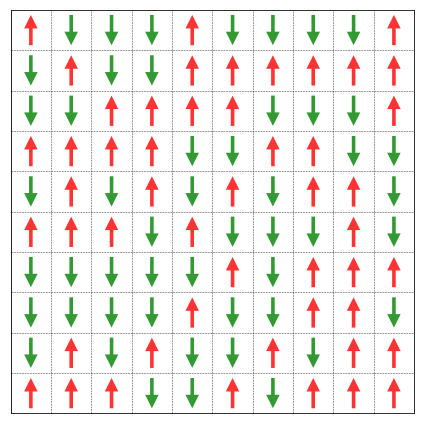

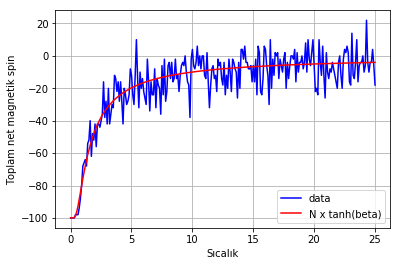

In [37]:
temp_range = np.arange(0.01, 25.1, 0.1) # sıcaklık değerleri
beta = 1/temp_range
Z = np.exp(beta) + np.exp(-beta)
prob_up = np.exp(beta)/Z
prob_down = np.exp(-beta)/Z
diff_t_samples = []

for i in range(len(temp_range)):
    ensemble = []
    for k in range(100):
        a = np.random.uniform()
        if a < prob_up[i]:
            ensemble.append(+1)
        else:
            ensemble.append(-1)
    diff_t_samples.append(ensemble)
    if(i % 30 == 0): #Her üç derecede bir çiz
        print('Spin Dağılımı T= ', temp_range[i])
        plot_configurations([ensemble], 10)
        
    
net_spins = [-np.sum(x) for x in diff_t_samples]

plt.plot(temp_range, net_spins,'b',label = 'data')
plt.plot(temp_range,-100*np.tanh(beta), 'r', label='N x tanh(beta)')
plt.xlabel('Sıcalık')
plt.ylabel('Toplam net magnetik spin')
plt.grid(True)
plt.legend()
plt.show()   


Bir sonraki aşama spinleri sadece ısı rezervi ile değil, birbirleriyle etkileştirmek. Bunun için de istatistiksel fiziğin en temel modellerinden biri olan Ising Modeli'ni inceliyor olacağız.

In [43]:
##Spin konfigürasyonlarını görselleştirmek için kullanılan fonksiyon
def plot_configurations(conf, L):
    pylab.figure(figsize=(6 * len(conf), 6))
    s = 1.0 / L
    for i_c in range(len(conf)):
        c = conf[i_c]
        colors = {}
        for i in range(L*L):
            if(c[i] == 1):
                colors[str(i)] = 'r'
            else:
                colors[str(i)] = 'g'
        #print(colors)
        for l in range(L ** 2):
            x, y = ((l // L) + 0.5) * s, ((l - (l // L) * L) + 0.5) * s
            dy = c[l] * 0.85 / float(L)
            arrow = FancyArrowPatch((x, y - 0.5 * dy), (x, y + 0.5 * dy), \
                    fc= colors[str(l)], color='.2', lw=0, alpha=.8, \
                    arrowstyle="Simple, head_length=" + str(0.9 * 150 * s) \
                    + ", head_width=" + str(0.9 * 150 * s) + ", tail_width=" \
                    + str(0.9 * 40 * s))
            pylab.gca().add_patch(arrow)
        pylab.axis('scaled')
        pylab.axis([0, 1, 0, 1])
        pylab.gca().set_xticks([])
        pylab.gca().set_yticks([])
        [pylab.axhline(y=(i * s), ls='--', c='.2', lw=0.5) for i in range(L)]
        [pylab.axvline(x=(j * s), ls='--', c='.2', lw=0.5) for j in range(L)]
    
    pylab.tight_layout()
    #pylab.savefig(output_dir + '/' + filename)
    pylab.show()
    pylab.clf()
    
#Kod referansı: https://www.coursera.org/learn/statistical-mechanics 
#coursera statistical mechanics algorithms and computation - werner krauth